In [123]:
import gensim
import nltk
import numpy as np
import pandas as pd

from gensim.models import Word2Vec
from nltk.data import find
import matplotlib
from sklearn.manifold import TSNE
import string
from urllib.request import urlopen
import nltk, re, pprint
from nltk import word_tokenize
from nltk import tokenize
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [125]:
model_google = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


In [126]:
word_pairs = [
              ('France', 'England') ,
              ('smaller', 'bigger'), 
              ('England', 'London'), 
              ('France', 'Rocket'), 
              ('big', 'bigger')
            ]

q1: Compute the cosine similarity

In [127]:
for pair in word_pairs:
    print(model_google.similarity(pair[0], pair[1]))

0.39804946199997737
0.7302272087331374
0.43992858122481976
0.07114174367741377
0.6842385598892737


Q2 : Write an expression to extract the vector representations of the words (France, England, smaller, bigger, rocket, big).

In [129]:
for i in ('France', 'England', 'smaller', 'bigger', 'rocket', 'big'):
    print(model_google[i])

[ 4.85839844e-02  7.86132812e-02  3.24218750e-01  3.49121094e-02
  7.71484375e-02  3.54003906e-02 -1.25976562e-01 -3.86718750e-01
 -1.31835938e-01  2.91748047e-02 -1.44531250e-01 -1.42578125e-01
  1.79687500e-01 -2.75390625e-01 -1.65039062e-01  9.32617188e-02
  1.17187500e-01  1.82617188e-01  6.10351562e-02  1.14257812e-01
  1.82617188e-01 -1.16699219e-01 -3.24707031e-02 -7.56835938e-02
  9.64355469e-03  8.59375000e-02 -2.85156250e-01 -2.55859375e-01
  3.01513672e-02  2.16796875e-01 -1.00097656e-01  2.85644531e-02
 -2.81250000e-01 -8.39843750e-02 -2.02636719e-02 -1.96289062e-01
 -4.78515625e-02  7.12890625e-02 -1.42578125e-01 -1.13525391e-02
  1.16210938e-01  7.22656250e-02  1.47460938e-01  1.50390625e-01
  1.40625000e-01  2.47070312e-01 -1.69921875e-01  7.76367188e-02
 -5.44433594e-02  1.66992188e-01 -1.45507812e-01  2.12402344e-02
 -7.51953125e-02  4.58984375e-02 -2.55859375e-01  1.49414062e-01
 -5.62500000e-01 -1.34765625e-01 -1.87500000e-01 -3.26538086e-03
  8.44726562e-02  1.33789

Q3: Repeat the exercise from Q1 by finding the euclidean distances between the word pairs.

In [130]:
for pair in word_pairs:
    print(pair[0], ", ", pair[1], ' = ', np.linalg.norm(model_google[pair[0]]-model_google[pair[1]]))

France ,  England  =  3.0151067
smaller ,  bigger  =  1.8618743
England ,  London  =  2.8752837
France ,  Rocket  =  3.892071
big ,  bigger  =  1.9586496


Q4: What is the relationship between the magnitude of individual vectors, the vectors themselves and the cosine distance for any pair of words. Choose any tuple in Q1 and provide your answer.

We know that semantic meaning is encoded in the vector (which consists of the direction and size). Looking at the word pairs it doesn't seem to look as if the size of the vector doesn't matter. Rather it is when we look at both aspects of a vector as a whole (ie. using cosine distance or adding subtracting vectors) when we are able to find words in different contexts. Interestingly, this is consistent with most neural net analyzed images, in which the cosine distance usually is what encodes allot more of the meaning. 

Q5: Time to dabble with the power of Word2Vec. Find the 2 closest words for the following conditions:

In [131]:
print(model_google.most_similar(positive=["king"], negative=["queen"], topn=2))

[('Sultan', 0.2812919020652771), ('P._Calamos', 0.27442067861557007)]


In [132]:
print(model_google.most_similar(positive=["bigger","small"], negative=["big"], topn=2))

[('larger', 0.7402471899986267), ('smaller', 0.7329993844032288)]


In [133]:
print(model_google.most_similar(positive=["man","programmer"], negative=["woman"], topn=2))

[('programer', 0.5371963977813721), ('programmers', 0.5310999155044556)]


In [134]:
print(model_google.most_similar(positive=["school","shooting"], negative=["guns"], topn=2))

[('elementary', 0.5435296297073364), ('eighth_grade', 0.47330963611602783)]


In [135]:
print(model_google.most_similar(positive=["texas","milwaukee"], negative=["wisconsin"], topn=2))

[('houston', 0.5542162656784058), ('dallas', 0.5138501524925232)]


Q6: Using the vectors for the words in the Google News dataset, explore the semantic representation of these words through K-means clustering and explain your findings.

In [137]:

to_dict = model_google.index2word
gensimdict = np.zeros((len(to_dict), model_google.vector_size))
for index, word in enumerate(to_dict):
    gensimdict[index, :] += model_google[word]



In [140]:
df_google = pd.DataFrame(gensimdict)
dfsample = df_google.sample(5000)

words = [to_dict[i] for i in dfsample.index]

In [141]:

norm = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(dfsample)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.097s...
[t-SNE] Computed neighbors for 5000 samples in 14.191s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.337592
[t-SNE] Computed conditional probabilities in 0.445s
[t-SNE] Iteration 50: error = 90.8860626, gradient norm = 0.2619601 (50 iterations in 16.068s)
[t-SNE] Iteration 100: error = 93.3675537, gradient norm = 0.1862898 (50 iterations in 17.768s)
[t-SNE] Iteration 150: error = 96.6749191, gradient norm = 0.1266950 (50 iterations in 13.846s)
[t-SNE] Iteration 200: error = 94.2302017, gradient norm = 0.1558602 (50 iterations in 14.937s)
[t-SNE] Iteration 250: error = 95.5577774, gradient norm = 0.1

In [142]:
df_flat = pd.DataFrame(norm)
df_flat['name'] = words
df_flat = df_flat.rename(index=str, columns={0: "x", 1: "y"})
df_flat.head(10)

,x,y,name
0,17.636175,-6.355705,Izola_Restaurant
1,9.453274,-13.256618,countries_www.urscorp.com
2,-17.140745,3.242395,Ied
3,-0.084589,17.002808,Willie_Roaf_hamstring
4,-13.883211,-16.671312,Joubert_syndromes
5,7.926625,1.979126,condom_dispenser
6,-6.555160,-9.860545,PIE
7,6.108406,-8.367017,Ante_Sapina_brothers
8,1.447219,3.409462,re
9,9.380250,16.825151,Usack


In [144]:
df_flat.to_csv(path_or_buf= "flattened_google", sep='\t')

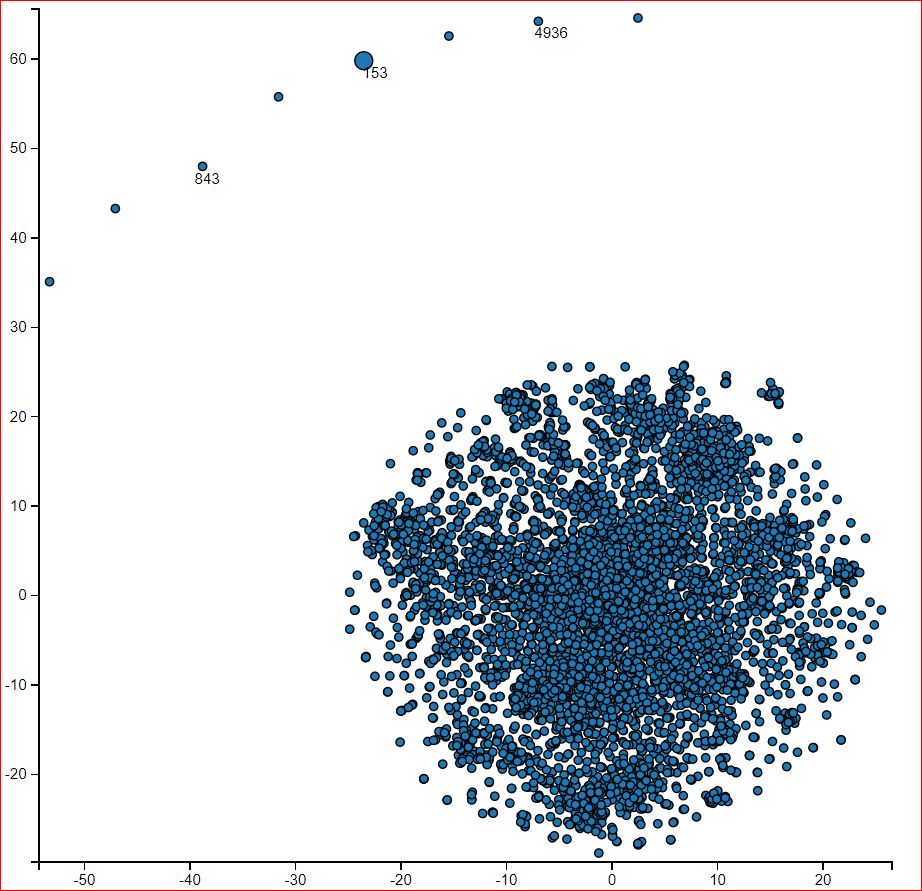

In [145]:
from IPython.display import Image
Image(filename='food_harbor.png')

### Here we used TSNE to reduce the dimensionality of the google news corpus to visulaize the data before using clustering analysis on the reduced corpus.

In [146]:
ks = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(norm)
    ks.append(abs(kmeans.score(norm)))



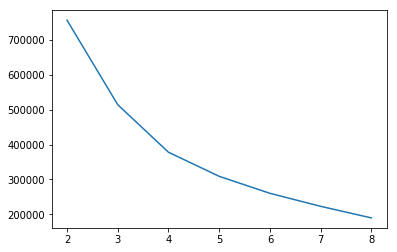

In [147]:
plt.plot(range(2,9), ks)

plt.show()

We would put the optimal k as 4. We would hope to see that through the kmeans that words that have similar "contexts" are generally grouped together. However if you look at the actual groupings below we see that this is not actually the case. Perhaps this is because of the fact that I only used a relatively small number of samples (restriction on harware) or because of the fact that the samples were taken at random. The resulting k-means clusters did not give me immediately obvious clusters

In [148]:
kmeanModel = KMeans(n_clusters=4).fit(norm)
label = kmeanModel.fit_predict(norm)

In [149]:
clusteranalyze = pd.DataFrame()
clusteranalyze['label'] = label
clusteranalyze['word'] = words


In [150]:
clusteranalyze[clusteranalyze.label==0]

,label,word
4,0,Joubert_syndromes
6,0,PIE
13,0,como_un
15,0,DriveTrust
31,0,subsequent_amendments_thereto
41,0,Giovanni_Recordati
45,0,By_KANWAL_TARIQ
58,0,economist_Amber_Rabinov
62,0,United_Parcel_Svc
63,0,Attributions


In [151]:
clusteranalyze[clusteranalyze.label==1]

,label,word
0,1,Izola_Restaurant
1,1,countries_www.urscorp.com
5,1,condom_dispenser
7,1,Ante_Sapina_brothers
8,1,re
10,1,Pieter_Toerien
11,1,Shirley_Ririe
16,1,Gimlette
21,1,Roberto_Zucco
22,1,Cafe_Internationale


In [152]:
clusteranalyze[clusteranalyze.label==2]

,label,word
3,2,Willie_Roaf_hamstring
9,2,Usack
12,2,Gary_McSwegan
17,2,Dall'Oglio
18,2,Dix_Noonan
19,2,Premium_Saltine
26,2,KOLO_TOURE
27,2,CONTINUING_COVERAGE
32,2,Steetley
36,2,goalkeeper_Kameni


In [153]:
clusteranalyze[clusteranalyze.label==3]

,label,word
2,3,Ied
14,3,Jiri_Krizan
20,3,teammate_Rubens_Barichello
23,3,Sister_Eugenia_Bonetti
24,3,KOTC
25,3,competitive_devaluations
28,3,Baie_d'_Orange
29,3,Boycott_Divestment_Sanctions
30,3,Gardez
33,3,Supertalk


Q7: What loss function does the skipgram model use and briefly describe what this function is minimizing 

We know that the skipgram model tries to maximize the log probability of a word given some context. Through this we know that we minimize the negative log probability 

I will choose a fictional novel. Probably an young adult fiction along the lines of percy jackson. However, If we do have to pick one from the thing I would pick the nltk corpus. More specifically I would use the Brown movie reviews.

Since most of the words are coming from a review context I would expect relationships that are specificly movie related (in a review context) or review related to hold. Examples are

1. trouble + dictator + news - Democracy - = some form of communism or trouble (or a word related to it).
This is based on the assumption that reviewer and writers will use the word democracy and the other words when describing troubling news with regards to countries ruled by dictators. As such I believe subtracting democracy, usually an ideology related to justice and good, from these terms will give us a negative term relating to chaos or turmoil
2. drama - comedy = tragedy
Again the reasoning behind this is the same as point one where I believe drama will often be discussed in the context of humor and tragedy. I believe this will be captured in the encoding and as such the lack of comedy in drama will lead to a word that is "sad" in nature 
3. Enjoy - Love + Hate = Dislike (or a synonym)
The reason behind this is that I believe that Enjoy will often appear more often in the context of love and in a very different context to Hate. Thus i feel that subtracting love from enjoy and adding hate will make it more cosine similar to the words like dislike or words that imply "didn't enjoy".

In [2]:
import nltk
from nltk import word_tokenize
from nltk import tokenize
from nltk.corpus import brown 
from nltk.corpus import inaugural
from sklearn.manifold import TSNE

In [41]:
#nltk.download('inaugural')
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Mike\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mike\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [87]:
# The brown corpus sents returns a tokenized version of the texts:
words = brown.sents(categories=['editorial','news', 'reviews'])
print(len(words))

#unique words 
unique = set()
for s in words:
    for w in s:
        unique.add(w)
unique = list(unique)
print(words[1002])


9371
['To', 'step', 'up', 'the', "denomination's", 'program', ',', 'the', 'Rev.', 'Mr.', 'Brandt', 'suggested', 'the', 'vision', 'of', '8,000', 'new', 'Assemblies', 'of', 'God', 'churches', 'in', 'the', 'next', '10', 'years', '.']


In [88]:
model = gensim.models.Word2Vec(words, min_count=1, size = 50, window=7)

In [112]:
print(model.most_similar(positive=["trouble", "dictator", "news"], negative=["democracy"], topn=2))

[('pointed', 0.9692434072494507), ('victim', 0.9686919450759888)]


C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [102]:
print(model.most_similar(positive=["drama"], negative=["comedy"], topn=10))

[('museum', 0.6027642488479614), ('fore', 0.515658438205719), ('congenial', 0.4835453927516937), ('smarted', 0.4697224497795105), ('indecisiveness', 0.4622631072998047), ('better-remembered', 0.4536352753639221), ('misconstrued', 0.45310884714126587), ('housed', 0.45091912150382996), ('homecoming', 0.4470975399017334), ('shirking', 0.43790116906166077)]


C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [105]:
print(model.most_similar(positive=["enjoy",'hate'], negative=["love"], topn=10))

[('Scapin', 0.9829591512680054), ('qualify', 0.9826080799102783), ('hope', 0.9811739325523376), ('talk', 0.9807295799255371), ('chance', 0.9806081652641296), ('feel', 0.9803856015205383), ('it', 0.9802289009094238), ('wrong', 0.9801809787750244), ('what', 0.979986846446991), ('do', 0.9796836376190186)]


C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [113]:
vector_list=[] 
for i in unique:
    vector_list.append(model.wv[i])

In [114]:
print(len(unique))
len(vector_list)


22633


22633

In [115]:
data_flattened=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 22633 samples in 0.087s...
[t-SNE] Computed neighbors for 22633 samples in 36.367s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22633
[t-SNE] Computed conditional probabilities for sample 2000 / 22633
[t-SNE] Computed conditional probabilities for sample 3000 / 22633
[t-SNE] Computed conditional probabilities for sample 4000 / 22633
[t-SNE] Computed conditional probabilities for sample 5000 / 22633
[t-SNE] Computed conditional probabilities for sample 6000 / 22633
[t-SNE] Computed conditional probabilities for sample 7000 / 22633
[t-SNE] Computed conditional probabilities for sample 8000 / 22633
[t-SNE] Computed conditional probabilities for sample 9000 / 22633
[t-SNE] Computed conditional probabilities for sample 10000 / 22633
[t-SNE] Computed conditional probabilities for sample 11000 / 22633
[t-SNE] Computed conditional probabilities for sample 12000 / 22633
[t-SNE] Computed conditional probabilities for s

In [116]:
df = pd.DataFrame(data_flattened)
df['name'] = unique
df = df.rename(index=str, columns={0: "x", 1: "y"})
df.head(10)

,x,y,name
0,4.209132,17.539457,loyalist
1,-16.764538,-30.621649,695
2,-33.829498,-12.035723,ideology
3,11.283180,18.622911,appraisers
4,-20.387001,10.512012,borne
5,-16.869987,-18.650602,Tarzan
6,33.200455,23.673988,Betting
7,-22.089924,7.312474,plant-location
8,-23.310026,9.685106,requesting
9,-26.721485,-33.714912,reign


ks = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_flattened)
    ks.append(abs(kmeans.score(data_flattened)))
plt.plot(range(2,9), ks)
plt.show()

In [118]:
df.to_csv(path_or_buf= "flattened", sep='\t')

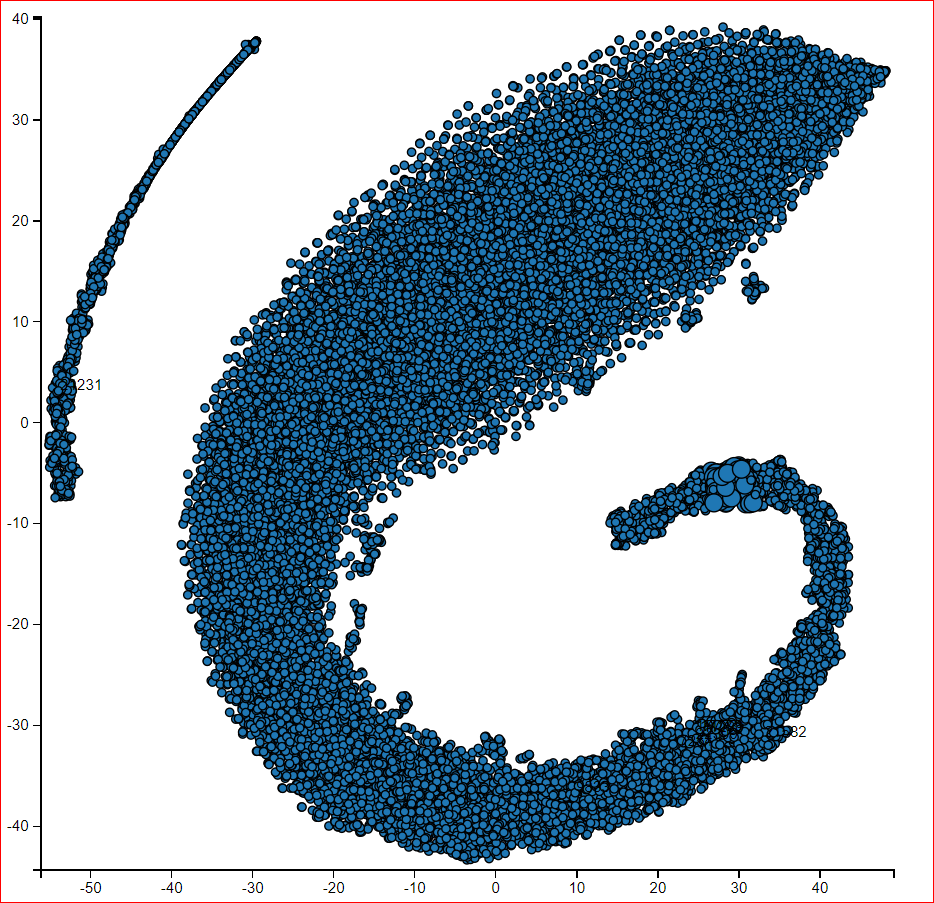

In [120]:
from IPython.display import Image
Image(filename='the_isle.png')